# Banknote authentication dataset analysis

## Introduction

The objective of this project is to perform an analysis of the "Banknote authentication" dataset using Machine Learning (K-means clustering). The aim is to determine if the data can be grouped in clusters based on the dataset features using K-Mean.

## Data description

### General information about the dataset

The original source of the dataser is **OpenML**
- dataset https://www.openml.org/d/1462
- CSV https://www.openml.org/data/get_csv/1586223/php50jXam

From the description on the OpenML website:

> Dataset about distinguishing genuine and forged banknotes.  
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used.  
The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained.  
A Wavelet Transform tool was used to extract features from these images.
>
> ### Attribute Information
>
> V1. variance of Wavelet Transformed image (continuous)  
> V2. skewness of Wavelet Transformed image (continuous)

The original dataset containes more features (V3, V4, class/target), which were excluded in this analysis for simplicity.

### Notebook setup

In [ ]:
# install a newer version of matplotlib
!pip install --quiet matplotlib==3.4.1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# set the Seaborn context and style 
sns.set_context("notebook")
sns.set_style("darkgrid")

# load the dataset
df = pd.read_csv("/content/Banknote-authentication-dataset.csv")

### Data exploration

In [ ]:
descr = """Info:\n"""
print(descr)

df.info()

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [ ]:
descr = """Shape:\n"""
print(descr)

df.shape

Shape:



(1372, 2)

In [ ]:
descr = """First 10 rows:\n"""
print(descr)

df.head()

First 10 rows:



,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [ ]:
descr = """Show statistical measures of the dataset (e.g., percentile, mean, std, min, max ...):\n"""
print(descr)

df.describe()

Show statistical measures of the dataset (e.g., percentile, mean, std, min, max ...):



,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [ ]:
descr = """min, max and mean:\n"""
print(descr)

for feature in ['V1', 'V2']:
    print(f"{feature} mean: {df[feature].mean()}\n")
    print(f"{feature} min/max:\n{df[feature].agg(('min', 'max'))}\n")

min, max and mean:

V1 mean: 0.43373525728862977

V1 min/max:
min   -7.0421
max    6.8248
Name: V1, dtype: float64

V2 mean: 1.9223531209912554

V2 min/max:
min   -13.7731
max    12.9516
Name: V2, dtype: float64



### Data visualisation

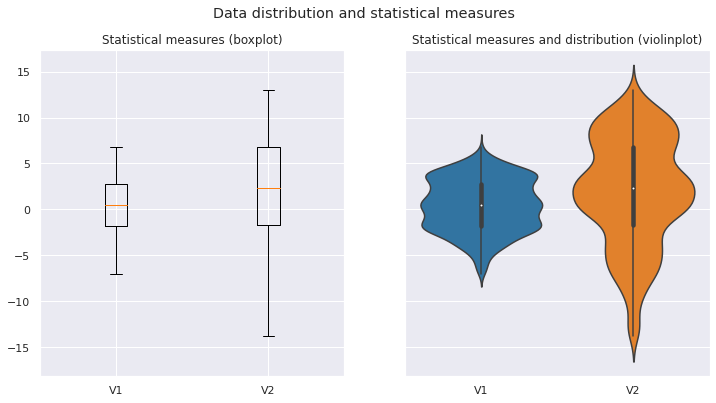

In [ ]:
# use boxplot, violin plot to visualise the distribution
# and some statistical measures (min, max, avg ...)
fig, ax = plt.subplots(ncols=2,
                       figsize=(12,6),
                       sharey=True)
fig.suptitle("Data distribution and statistical measures")

ax[0].boxplot([df["V1"], df["V2"]], labels=["V1", "V2"])
ax[0].set_title("Statistical measures (boxplot)")

sns.violinplot(data=df, scale="width", linewidth=1.5, ax=ax[1])
ax[1].set_title("Statistical measures and distribution (violinplot)")

plt.show()

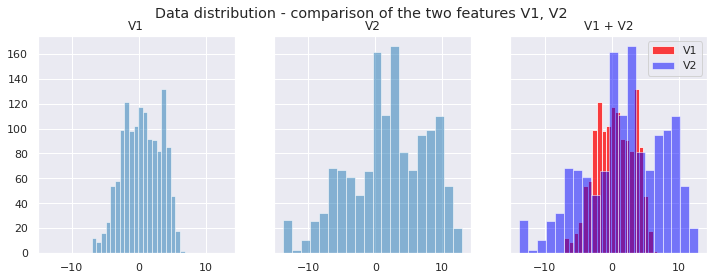

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,
                                    sharey=True,
                                    sharex=True,
                                    figsize=(12,4))
fig.suptitle('Data distribution - comparison of the two features V1, V2')

ax1.hist(df["V1"], alpha=0.5, bins=20)
ax1.set_title("V1")

ax2.hist(df["V2"], alpha=0.5, bins=20)
ax2.set_title("V2")

ax3.hist(df["V1"], alpha=0.75, label="V1", bins=20, color="r")
ax3.hist(df["V2"], alpha=0.5, label="V2", bins=20, color="b")
ax3.set_title("V1 + V2")
ax3.legend()

plt.show()

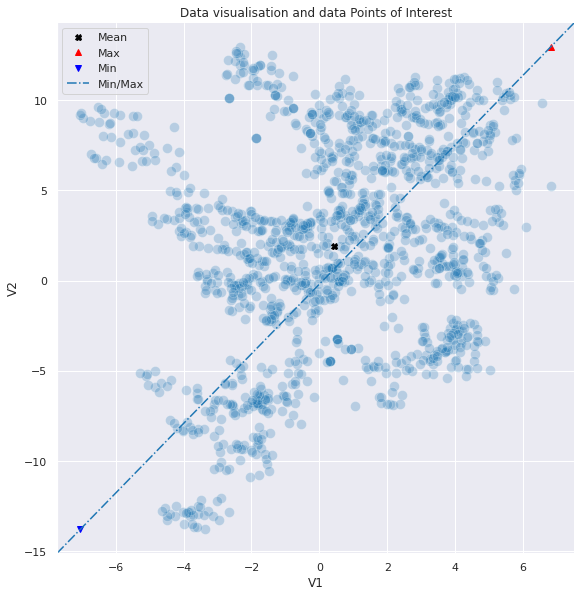

In [ ]:
_mean = df.V1.mean(), df.V2.mean()
_max = df.V1.max(), df.V2.max()
_min = df.V1.min(), df.V2.min()

g = sns.relplot(data=df, x="V1", y="V2", alpha=.25, s=100, height=8, aspect=1)

plt.plot(_mean[0], _mean[1], "kX", label="Mean")

plt.plot(_max[0], _max[1], "r^", label="Max")
plt.plot(_min[0], _min[1], "bv", label="Min")
plt.axline(_max, _min, ls="-.", label="Min/Max")

plt.legend()
plt.title("Data visualisation and data Points of Interest")

plt.show()

### Data description - Summary

The dataset is organised in 1372 rows x 2 columns (labelled "V1", "V2" respectively).

Based on the description of the dataset on OpenML (https://www.openml.org/d/1462), it appears that each row represents a single digitized image and thus V1 and V2 are connected as they represent two measurements obtained from the same image.
Specifically:
- V1. variance of Wavelet Transformed image (continuous)
- V2. skewness of Wavelet Transformed image (continuous)

For more information about variance and skewness see:
- https://en.wikipedia.org/wiki/Variance
- https://en.wikipedia.org/wiki/Skewness

Some data Point of Interest (`PoI`) from this dataset can be observed in the output of `df.describe()`:
- the standard deviation for V1 (`2.842763`) and V2 (`5.869047`) are quite far apart from each other
- and so are the respective min, max and mean values:  \
V1 min: `-7.042100`, max: `6.824800`, mean: `0.433735`  \
V2 min: `-13.773100`, max: `12.951600`, mean: `1.922353`

Initially the distribution was examined using a side by side boxplot and violinplot. This provides a visual representation of the min/max/mean for V1 and V2, and also (violinplot) of the data distribution.

Another visualisation of data distribution was constructed plotting three different histograms of the data, again side by side, using the same X and Y scale to allow for an easier comparison.  \
The last histogram on the right side shows V1+V2, which provides a good visualization of the V1 and V2 distribution in an overlay.

Finally, the last graph displays each row (V1, V2) as points in a scatterplot together with the three PoI corresponding to min/max/mean:
- min (V1 min, V2 min)
- mean (V1 mean, V2 mean)
- max (V1 max, V2max)

This is a very effective visualization to answer the question: is the data suitable for K-Means clustering?

The answer is yes as the visualisation shows groups of datapoints that could potentially form clusters.

## Method of analysis

### K-Means (n=2)

In [ ]:
# due to the nature of the dataset we already know
# that datapoints can be divided in two groups: genuine/not genuine

# set the number of clusters to 2 to confirm
# our hypotesis
clusters =  2

# as we are going to run k-means multiple times
# it's worth creating a helper function that returns
# some useful data (centers, inertia, etc)

def run_kmeans(dataframe):
    km = KMeans(n_clusters=clusters).fit(dataframe)
    return {"centers": km.cluster_centers_,
            "inertia": km.inertia_,
            "n_iter": km.n_iter_,
            "labels": km.labels_}

first_run = run_kmeans(df)
print("First run:", first_run)

# add the prediction to a new columns in the df

first_run_df = df.assign(prediction=first_run["labels"])
first_run_df.head()

First run: {'centers': array([[-0.19838275, -3.68774038],
       [ 0.88705643,  5.94561166]]), 'inertia': 26944.127641674884, 'n_iter': 15, 'labels': array([1, 1, 0, ..., 0, 0, 0], dtype=int32)}


,V1,V2,prediction
0,3.62160,8.6661,1
1,4.54590,8.1674,1
2,3.86600,-2.6383,0
3,3.45660,9.5228,1
4,0.32924,-4.4552,0


In [ ]:
# create a new column in the df to show the cluster based on "prediction"
cluster_mapping = {0: "Cluster A", 1: "Cluster B"}
first_run_df["cluster"] = first_run_df["prediction"].map(cluster_mapping)
first_run_df.head()

,V1,V2,prediction,cluster
0,3.62160,8.6661,1,Cluster B
1,4.54590,8.1674,1,Cluster B
2,3.86600,-2.6383,0,Cluster A
3,3.45660,9.5228,1,Cluster B
4,0.32924,-4.4552,0,Cluster A


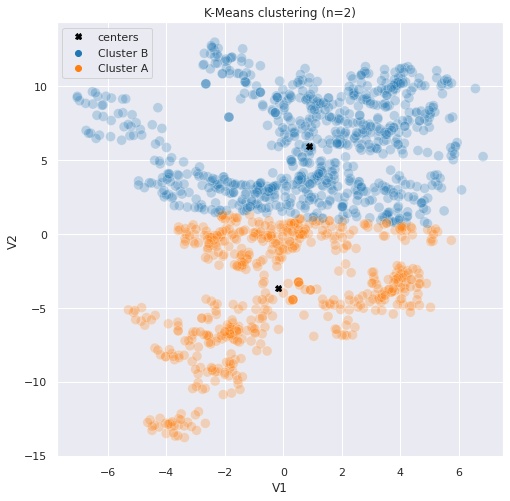

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title(f"K-Means clustering (n={clusters})")
g = sns.scatterplot(data=first_run_df, x="V1", y="V2", alpha=0.25, s=100, hue="cluster")
plt.plot(first_run["centers"][:, 0], first_run["centers"][:, 1], "kX", label="centers")
plt.legend()
plt.show()

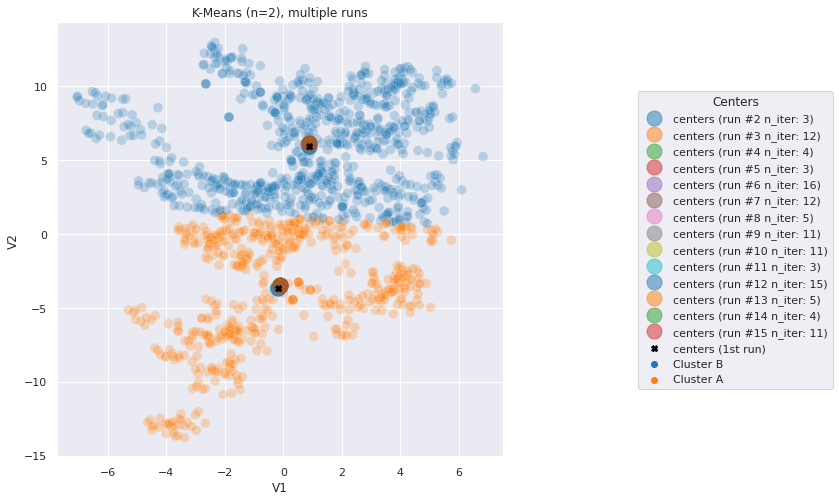

In [ ]:
# re-run K-means several times

# start plotting the first run
fig, ax = plt.subplots(figsize=(8,8))
plt.title(f"K-Means (n={clusters}), multiple runs")
g = sns.scatterplot(data=first_run_df, x="V1", y="V2", alpha=0.25, s=100, hue="cluster")

# run k-means 15 times, each time plot the new centers on top of the
# previous visualisation; collect all the runs in a list for further analysis,
# initialise the list with the `first_run`

all_runs = [first_run]

for _ in range(14):
    _d = run_kmeans(df)
    all_runs.append(_d)
    _label = f"centers (run #{_ + 2} n_iter: {_d['n_iter']})"
    plt.plot(_d["centers"][:, 0], _d["centers"][:, 1], "o", ms=15, alpha=0.5, label=_label)

# and finally plot the first run centers, so they show on top
plt.plot(first_run["centers"][:, 0], first_run["centers"][:, 1], "kX", label="centers (1st run)")
plt.legend(title="Centers", loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.show()

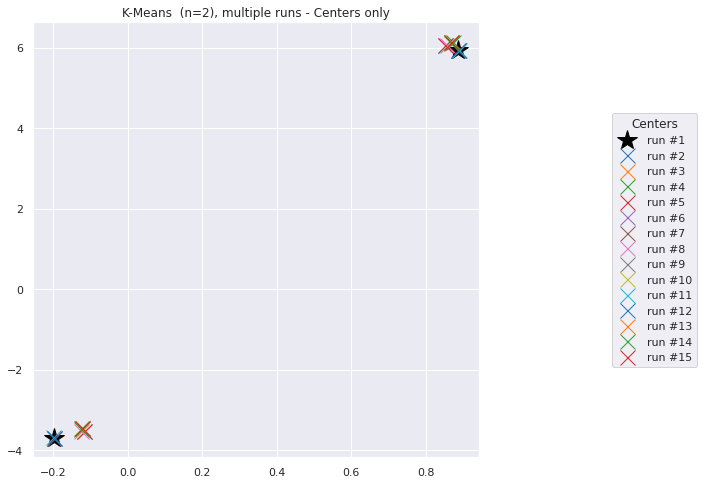

In [ ]:
# compare the results: is the K-means algorithm stable?

# Looking at the image above it seems the centers are pretty stable,
# to confirm it I will plot just the centers in a new grap

all_centers = [run["centers"] for run in all_runs]

fig, ax = plt.subplots(figsize=(8,8))
plt.title(f"K-Means  (n={clusters}), multiple runs - Centers only")

for i, element in enumerate(all_centers):
    _label = f"run #{i+1}"
    # make 1st run bigger and use a different shape
    _size = 20 if i == 0 else 15
    _shape = "k*" if i == 0 else "x"
    plt.plot(element[:, 0], element[:, 1], _shape, ms=_size, label=_label)

plt.legend(title="Centers", loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

### K-Means (n=3)

In [ ]:
# what happens if we try to change the number of clusters to 3
clusters =  3

# as we are going to run k-means multiple times
# it's worth creating a helper function that returns
# some useful data (centers, inertia, etc)

def run_kmeans(dataframe):
    km = KMeans(n_clusters=clusters).fit(dataframe)
    return {"centers": km.cluster_centers_,
            "inertia": km.inertia_,
            "n_iter": km.n_iter_,
            "labels": km.labels_}

first_run = run_kmeans(df)
print("First run:", first_run)

# add the prediction to a new columns in the df

first_run_df = df.assign(prediction=first_run["labels"])
first_run_df.head()

First run: {'centers': array([[ 0.43399766,  1.28925426],
       [-0.83318711, -6.85594894],
       [ 1.23829399,  8.40748546]]), 'inertia': 16618.319668012366, 'n_iter': 4, 'labels': array([2, 2, 0, ..., 1, 1, 0], dtype=int32)}


,V1,V2,prediction
0,3.62160,8.6661,2
1,4.54590,8.1674,2
2,3.86600,-2.6383,0
3,3.45660,9.5228,2
4,0.32924,-4.4552,1


In [ ]:
# create a new column in the df to show the cluster based on "prediction"
cluster_mapping = {0: "Cluster A", 1: "Cluster B", 2: "Cluster C"}
first_run_df["cluster"] = first_run_df["prediction"].map(cluster_mapping)
first_run_df.head()

,V1,V2,prediction,cluster
0,3.62160,8.6661,2,Cluster C
1,4.54590,8.1674,2,Cluster C
2,3.86600,-2.6383,0,Cluster A
3,3.45660,9.5228,2,Cluster C
4,0.32924,-4.4552,1,Cluster B


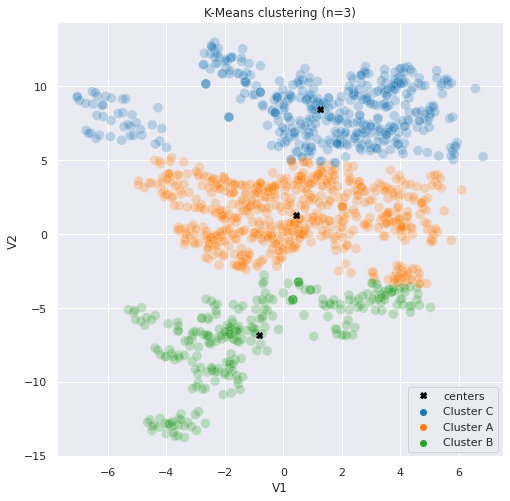

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.title(f"K-Means clustering (n={clusters})")
g = sns.scatterplot(data=first_run_df, x="V1", y="V2", alpha=0.25, s=100, hue="cluster")
plt.plot(first_run["centers"][:, 0], first_run["centers"][:, 1], "kX", label="centers")
plt.legend()
plt.show()

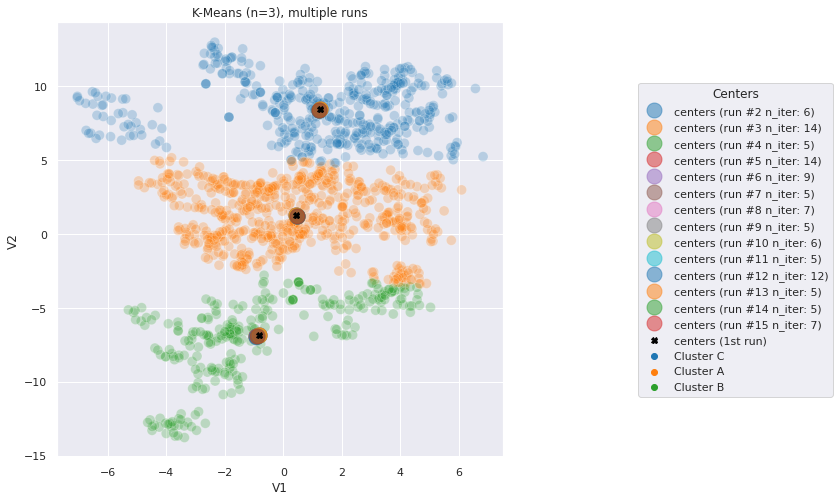

In [ ]:
# re-run K-means several times

# start plotting the first run
fig, ax = plt.subplots(figsize=(8,8))
plt.title(f"K-Means (n={clusters}), multiple runs")
g = sns.scatterplot(data=first_run_df, x="V1", y="V2", alpha=0.25, s=100, hue="cluster")

# run k-means 15 times, each time plot the new centers on top of the
# previous visualisation; collect all the runs in a list for further analysis,
# initialise the list with the `first_run`

all_runs = [first_run]

for _ in range(14):
    _d = run_kmeans(df)
    all_runs.append(_d)
    _label = f"centers (run #{_ + 2} n_iter: {_d['n_iter']})"
    plt.plot(_d["centers"][:, 0], _d["centers"][:, 1], "o", ms=15, alpha=0.5, label=_label)

# and finally plot the first run centers, so they show on top
plt.plot(first_run["centers"][:, 0], first_run["centers"][:, 1], "kX", label="centers (1st run)")
plt.legend(title="Centers", loc='center right', bbox_to_anchor=(1.75, 0.5))
plt.show()

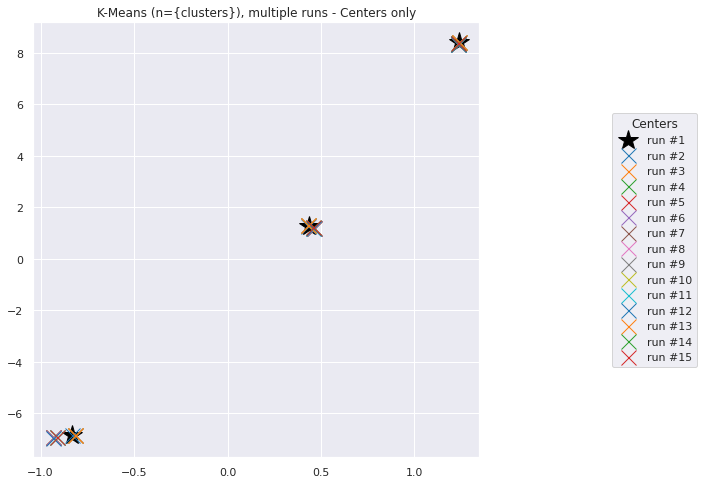

In [ ]:
# compare the results: is the K-means algorithm stable?

# Looking at the image above it seems the centers are pretty stable,
# to confirm it I will plot just the centers in a new grap

all_centers = [run["centers"] for run in all_runs]

fig, ax = plt.subplots(figsize=(8,8))
plt.title("K-Means (n={clusters}), multiple runs - Centers only")

for i, element in enumerate(all_centers):
    _label = f"run #{i+1}"
    # make 1st run bigger and use a different shape
    _size = 20 if i == 0 else 15
    _shape = "k*" if i == 0 else "x"
    plt.plot(element[:, 0], element[:, 1], _shape, ms=_size, label=_label)

plt.legend(title="Centers", loc='center right', bbox_to_anchor=(1.5, 0.5))
plt.show()

### Method of analysis - Summary

The K-Means analysis has been run multiple times with the number of clusters `n=2` and `n=3`.

In both cases two additional columns were added to the dataframe:
- `prediction`, cluster assignment as a numeric value
- `cluster`, cluster assigment as human friendly string

It appears that in both cases the clusters are stable. The `centers` for each iteration could be grouped in 2 or 3 different areas (for `n=2` and `n=3` respectively) close to each other.

The `n_iter`, which represents the number of iterations needed to find the `k` clusters, was also added to the visualisation.
Clustering the data required a relatively low number of iterations as `n_iter` was consistently low compared to the maximum number of iterations attempted (`300`).

## Conclusions

Running K-Means with number of clusters `n=2` and `n=3` shows that the data can be efficiently categorised and divided into clusters using Machine Learning.

## Recommendations

The project demonstrates that Machine Learning can be used effectively to recognise forged banknotes.

Using K-Means algorithm with a number of clusters equal to two can help to identify genuine/forged banknotes efficiently.

Increasing the number of clusters to three can help to efficiently identify genuine/forged banknotes and also a third group of banknotes which could be subject to further analysis (for example: genuine banknotes in bad conditions that can be mistaken for forged).

## Export to pdf

Run Jupyterlab locally, open the notebook and export it.

```
sudo apt-get update && sudo apt-get install python3 python3-venv

python3 -m venv my-venv
cd my-venv/
source bin/activate
pip install --upgrade pip
pip install jupyterlab
jupyter notebook
```
